In [82]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
shots_psa = pd.read_csv('./assets/mpd/shots_train_psa.csv')
shots_district_train = pd.read_csv('./assets/mpd/shots_spot_train.csv', index_col='Unnamed: 0')
shots_district_test  = pd.read_csv('./assets/mpd/shots_spot_test.csv', index_col='Unnamed: 0')

shots_psa.PSA = shots_psa.PSA.astype(str)
shots_psa.Date = pd.to_datetime(shots_psa.Date)
shots_district_train.district = shots_district_train.district.astype(str)
shots_district_train.date = pd.to_datetime(shots_district_train.date)
shots_district_test.district = shots_district_test.district.astype(str)
shots_district_test.date = pd.to_datetime(shots_district_test.date)

shots_psa.head()

,Date,PSA,Type_Multiple_Gunshots,Type_Single_Gunshot
0,2014-01-01,501,1,0
1,2014-01-01,502,1,0
2,2014-01-01,505,1,0
3,2014-01-01,708,1,0
4,2014-01-01,107,1,0


In [84]:
shots_district_train['day'] = shots_district_train['date'].dt.dayofweek
shots_district_test['day']  = shots_district_test['date'].dt.dayofweek

In [85]:
shots_district_train.head()

,date,district,type_multiple_gunshots,type_single_gunshot,turnover,resolved,svc_descr_collection,svc_descr_graffiti removal,svc_descr_light repair,svc_descr_maintenance,svc_descr_parking meter repair,svc_descr_street cleaning,day
0,2014-01-01,1,14,18,106.181818,22.0,6.0,0.0,0.0,0.0,11.0,0.0,2
1,2014-01-02,1,0,0,183.420792,195.0,27.0,0.0,7.0,5.0,137.0,2.0,3
2,2014-01-03,1,0,0,342.754386,109.0,12.0,0.0,5.0,8.0,61.0,1.0,4
3,2014-01-04,1,0,0,224.877005,186.0,33.0,0.0,1.0,2.0,117.0,1.0,5
4,2014-01-05,1,0,0,136.862069,28.0,17.0,0.0,1.0,3.0,0.0,2.0,6


In [86]:
shots_district_train.day = shots_district_train.day.map(days)

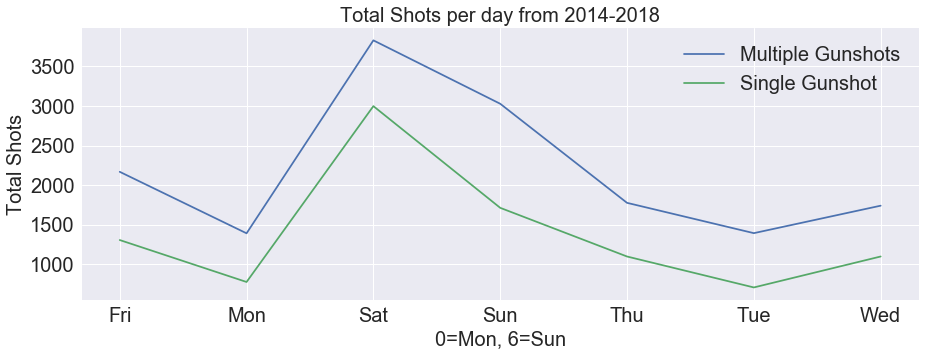

In [87]:
plt.figure(figsize=(15,5))
plt.plot(shots_district_train.groupby(['day'])['type_multiple_gunshots'].agg('sum'), label='Multiple Gunshots')
plt.plot(shots_district_train.groupby(['day'])['type_single_gunshot'].agg('sum'), label='Single Gunshot')
plt.title('Total Shots per day from 2014-2018', size=20)
plt.ylabel('Total Shots', size=20)
plt.yticks(size=20)
plt.xticks(size=20)
plt.xlabel('0=Mon, 6=Sun', size=20)
plt.legend(fontsize=20);

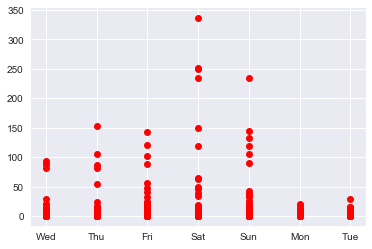

In [88]:
plt.plot(shots_district_train.day, shots_district_train.type_multiple_gunshots, 'ro')

In [89]:
def mnth_yr(df):
    df = df.copy()
    df['mnth_yr'] = df.Date.dt.to_period('M')
    df.drop(['Date'], axis=1, inplace=True)
    return df

my_psa = mnth_yr(shots_psa)

In [90]:
my_psa = my_psa.groupby(['PSA', 'mnth_yr'])['Type_Multiple_Gunshots', 'Type_Single_Gunshot'].agg('sum')

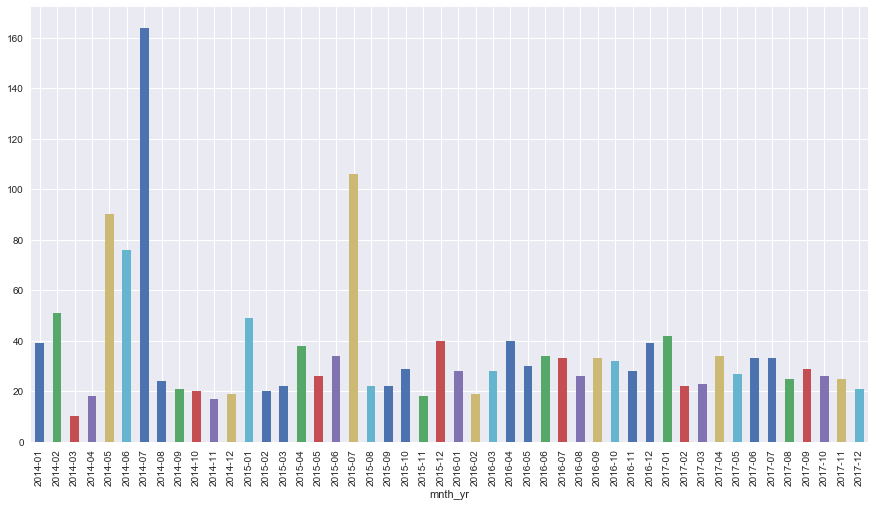

In [91]:
plt.figure(figsize=(15, 8))
foo = my_psa.reset_index()
for bar in foo['PSA'].unique():
    foo[foo['PSA'] == bar].set_index('mnth_yr')['Type_Multiple_Gunshots'].plot(kind='bar')

In [92]:
def date_separate(df):
    df = df.copy()
    df['Year'] = pd.DatetimeIndex(df['Date']).year
    df['Month'] = pd.DatetimeIndex(df['Date']).month
#     df['Day'] = pd.DatetimeIndex(df['Date']).day
    df.drop(['Date'], axis=1, inplace=True)
    return df

shots_psa = date_separate(shots_psa)

In [93]:
psa_month = shots_psa.groupby(['Month'])['Type_Multiple_Gunshots', 'Type_Single_Gunshot'].agg('sum')

In [94]:
psa_month.head()

,Type_Multiple_Gunshots,Type_Single_Gunshot
Month,,
1,1891,978
2,592,374
3,705,475
4,846,570
5,953,647


In [95]:
psa_month.head()

,Type_Multiple_Gunshots,Type_Single_Gunshot
Month,,
1,1891,978
2,592,374
3,705,475
4,846,570
5,953,647


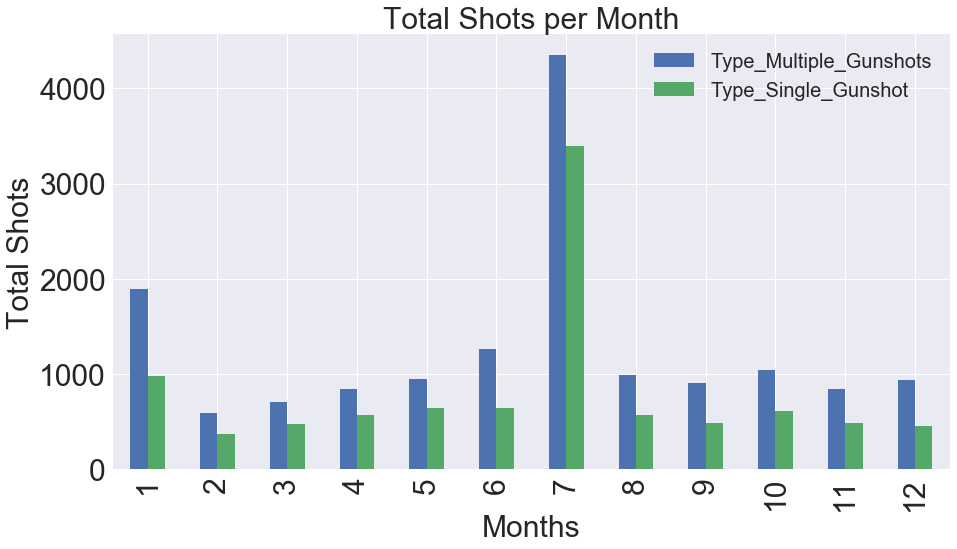

In [103]:
psa_month.plot(kind='bar', figsize=(15, 8))
plt.title('Total Shots per Month', size=30)
plt.ylabel('Total Shots', size=30)
plt.yticks(size=30)
plt.xlabel('Months', size=30)
plt.xticks(size=30)
plt.legend(fontsize=20);

In [104]:
plt.figure(figsize=(15, 8))
foo = psa_month.reset_index()
for bar in foo['Month'].unique():
    foo[foo['Month'] == bar].set_index('PSA')['Type_Multiple_Gunshots'].plot(kind='bar')

KeyError: 'PSA'

<Figure size 1080x576 with 0 Axes>

In [105]:
shots_psa2014 = shots_psa[shots_psa.Year == 2014]
shots_psa2015 = shots_psa[shots_psa.Year == 2015]
shots_psa2016 = shots_psa[shots_psa.Year == 2016]
shots_psa2017 = shots_psa[shots_psa.Year == 2017]

In [106]:
def year_process(df):
    df = df.groupby(['Month'])['Type_Multiple_Gunshots', 'Type_Single_Gunshot'].agg('sum')
    df = df.reset_index()
    return df

shots_psa2014 = year_process(shots_psa2014)
shots_psa2015 = year_process(shots_psa2015)
shots_psa2016 = year_process(shots_psa2016)
shots_psa2017 = year_process(shots_psa2017)

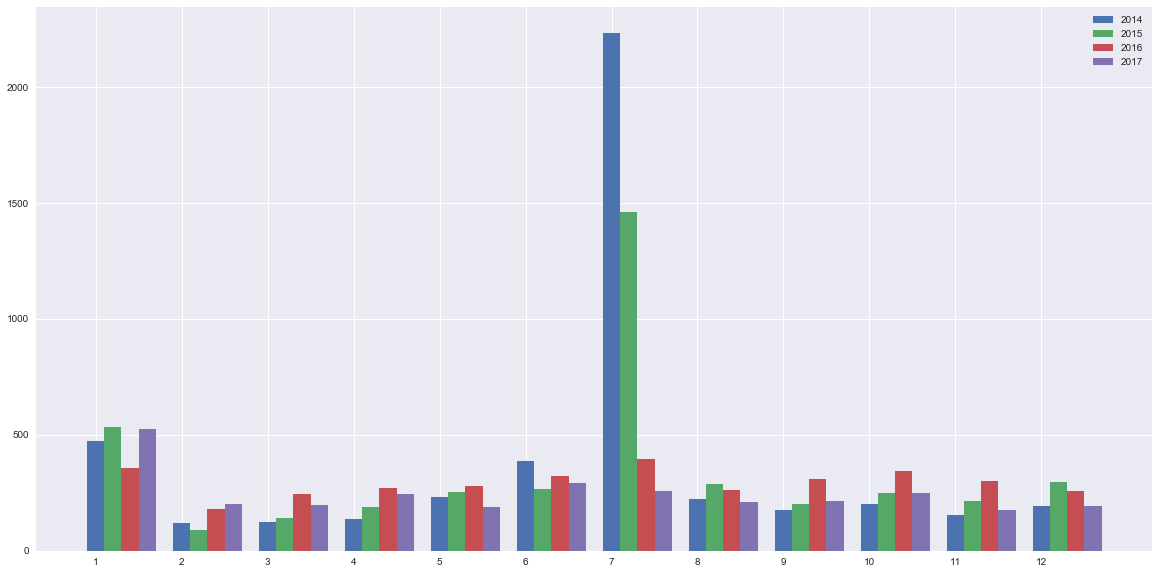

In [107]:
width = 0.2

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(shots_psa2014.Month+0.00, height=shots_psa2014.Type_Multiple_Gunshots, width=width, label='2014')
plt.bar(shots_psa2015.Month+0.2, height=shots_psa2015.Type_Multiple_Gunshots, width=width, label='2015')
plt.bar(shots_psa2016.Month+0.40, height=shots_psa2016.Type_Multiple_Gunshots, width=width, label='2016')
plt.bar(shots_psa2017.Month+0.6, height=shots_psa2017.Type_Multiple_Gunshots, width=width, label='2017')
plt.xticks(shots_psa2014.Month)
plt.legend();

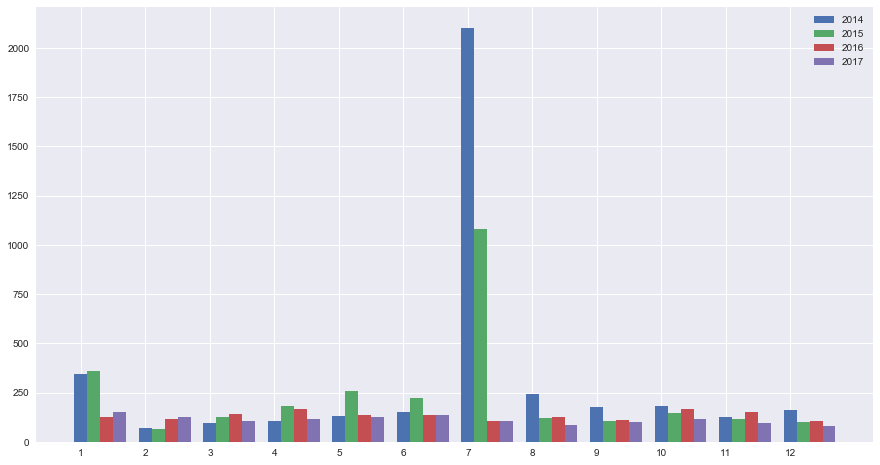

In [108]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.bar(shots_psa2014.Month+0.00, height=shots_psa2014.Type_Single_Gunshot, width=width, label='2014')
plt.bar(shots_psa2015.Month+0.2, height=shots_psa2015.Type_Single_Gunshot, width=width, label='2015')
plt.bar(shots_psa2016.Month+0.40, height=shots_psa2016.Type_Single_Gunshot, width=width, label='2016')
plt.bar(shots_psa2017.Month+0.6, height=shots_psa2017.Type_Single_Gunshot, width=width, label='2017')
plt.xticks(shots_psa2014.Month)
plt.legend();

In [110]:
shots_district = pd.read_csv('./assets/mpd/shots_spot_train.csv')
shots_district.drop('Unnamed: 0', axis=1, inplace=True)

shots_district.date = pd.to_datetime(shots_district.date)
shots_district = shots_district.set_index('date')

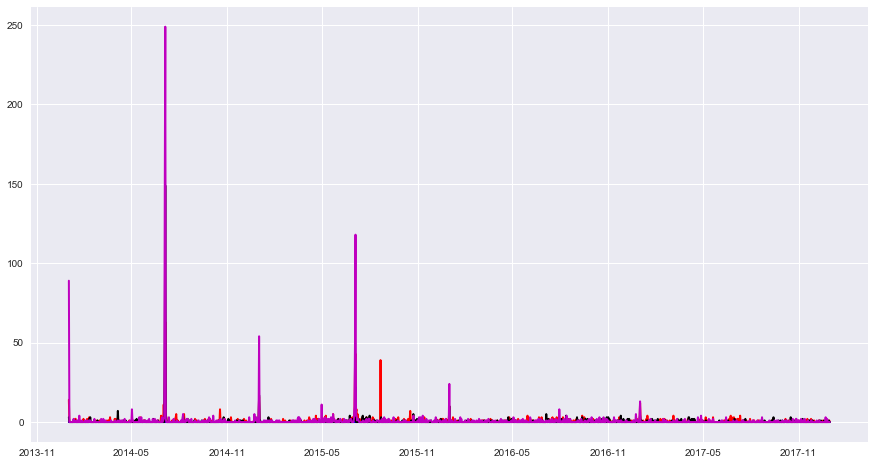

In [111]:
d1 = shots_district[shots_district.district == 1]
d2 = shots_district[shots_district.district == 2]
d3 = shots_district[shots_district.district == 3]
d4 = shots_district[shots_district.district == 4]
d5 = shots_district[shots_district.district == 5]
d6 = shots_district[shots_district.district == 6]
d7 = shots_district[shots_district.district == 7]

plt.figure(figsize=(15, 8))
plt.plot(d1.type_multiple_gunshots, 'r-', lw=2)
plt.plot(d2.type_multiple_gunshots, 'b-', lw=2)
plt.plot(d3.type_multiple_gunshots, 'k-', lw=2)
plt.plot(d4.type_multiple_gunshots, 'm-', lw=2)